# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import matplotlib.pyplot as plt;

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [2]:
env = UnityEnvironment("Banana.app")
# reset the environment
brain_name = env.brain_names[0];
brain = env.brains[brain_name];

env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [2]:
import torch;
import torch.nn as nn;
import torch.optim as optim;
import torch.nn.functional as F;
from collections import namedtuple, deque;
from unityagents import UnityEnvironment
import random;

In [3]:
class QNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed, fc1_size=64, fc2_size=64):
        super(QNetwork, self).__init__();
        
        self.state_size = state_size;
        self.action_size = action_size;
        
        self.seed = torch.manual_seed(seed);
        self.fc1 = nn.Linear(state_size, fc1_size);
        self.fc2 = nn.Linear(fc1_size, fc2_size);
        self.fc3 = nn.Linear(fc2_size, action_size);
    
    def forward(self, state):
        x = F.relu(self.fc1(state));
        x = F.relu(self.fc2(x));
        return self.fc3(x);

In [4]:
class DuelingQNetwork(nn.Module):
    def __init__(self, state_size, action_size, seed, fc1_size=64, fc2_size=64):
        super(DuelingQNetwork, self).__init__();
        
        self.state_size = state_size;
        self.action_size = action_size;
        
        self.seed = torch.manual_seed(seed);
        self.fc1 = nn.Linear(state_size, fc1_size);
        self.fc2 = nn.Linear(fc1_size, fc2_size);
        
        self.value_fc = nn.Linear(fc2_size, 1);
        self.advantage_fc = nn.Linear(fc2_size, action_size);
        
    def forward(self, state):
        x = F.relu(self.fc1(state));
        x = F.relu(self.fc2(x));
        
        v = self.value_fc(x);
        a = self.advantage_fc(x);
        
        q = v + a - a.mean(1).unsqueeze(1).expand(x.size(0), self.action_size) / self.action_size;
        return q;

In [5]:
comp_device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu");
GAMMA = 0.99; # discount factor
LEARNING_RATE = 5e-4; #learning rate
BATCH_SIZE = 64;
TAU = 1e-3;
EPS = 0.1;
EPS_LIMIT = 0.01;
EPS_DECAY = 0.995;

In [6]:
class ReplayBuffer():
    def __init__(self, action_size, batch_size, seed):
        self.action_size = action_size;
        self.buffer = deque(maxlen=int(1e5));
        self.batch_size = batch_size;
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"]);
        self.seed = random.seed(seed);
    
    
    def add(self, state, action, reward, next_state, done):
        exp = self.experience(state, action, reward, next_state, done);
        self.buffer.append(exp);
    
    def get_sample(self):
        experiences = random.sample(self.buffer, k=self.batch_size);
        
        states = torch.from_numpy(np.vstack([exp.state for exp in experiences if exp is not None])).float()
        actions = torch.from_numpy(np.vstack([exp.action for exp in experiences if exp is not None])).long()
        rewards = torch.from_numpy(np.vstack([exp.reward for exp in experiences if exp is not None])).float()
        next_states = torch.from_numpy(np.vstack([exp.next_state for exp in experiences if exp is not None])).float()
        dones = torch.from_numpy(np.vstack([exp.done for exp in experiences if exp is not None]).astype(np.uint8)).float()
        
        exp_torch = [states, actions, rewards, next_states, dones];
        exp_torch = tuple([item.to(comp_device) for item in exp_torch]);
        return exp_torch;
    
    def __len__(self):
        return len(self.buffer);

In [7]:
class Agent():
    def __init__(self, state_size, action_size, seed):
        self.state_size = state_size;
        self.action_size = action_size;
        
        self.qnetworks = (DuelingQNetwork(state_size, action_size, seed).to(comp_device), \
                          DuelingQNetwork(state_size, action_size, seed).to(comp_device));
        
        self.optimizer = optim.Adam(self.qnetworks[0].parameters(), lr=LEARNING_RATE);
        
        self.replay_buffer = ReplayBuffer(action_size, BATCH_SIZE, seed);
        self.time_step = 0;
        
    def step(self, state, action, reward, next_state, done):
        self.replay_buffer.add(state, action, reward, next_state, done);
        
        # learning happens at every 4 time steps
        self.time_step = (self.time_step + 1) % 4;
        
        if self.time_step == 0:
        # learning from the experience replay buffer
            if len(self.replay_buffer) > BATCH_SIZE:
                experiences = self.replay_buffer.get_sample();
                self.learn(experiences, GAMMA);

    def act(self, state, epsilon=0.):
        # Returns an action using the epsilon greedy policy
        state = torch.from_numpy(state).float().unsqueeze(0).to(comp_device);
        self.qnetworks[0].eval();
        with torch.no_grad():
            action_values = self.qnetworks[0](state);
        self.qnetworks[0].train();
        
        # Select action using epsilon-greedy policy
        if random.random() > epsilon:
            return np.argmax(action_values.cpu().data.numpy());
        else:
            return random.choice(np.arange(self.action_size));
        
    def learn(self, experiences, gamma):
        # Update values based on experience tuples
        
        states, actions, rewards, next_states, dones = experiences;
        
        # get the max predicted q values by running through "next_states" on the target model
        q_targets_next = self.qnetworks[1](next_states).detach().max(1)[0].unsqueeze(1);

        # compute the q targets
        q_targets_curr = rewards + (gamma * q_targets_next * (1 - dones));
        
        # get expected q values from the qnetwork_local model
        q_expected = self.qnetworks[0](states).gather(1, actions);
        
        # compute loss
        loss = F.mse_loss(q_expected, q_targets_curr);
        
        # optimization and backprop
        self.optimizer.zero_grad();
        loss.backward();
        self.optimizer.step();
        
        self.soft_update(self.qnetworks[0], self.qnetworks[1], TAU);
    
    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0 - tau)*target_param.data);

In [9]:
env = UnityEnvironment(file_name="Banana.app")

brain_name = env.brain_names[0];
brain = env.brains[brain_name];

num_iterations = 2000;
max_timesteps = 1000;

env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
state_size = len(state)

action_size = brain.vector_action_space_size;

dqn_agent = Agent(state_size, action_size, 1024);

scores = [];
scores_queue = deque(maxlen=100);
discount = EPS;
for ite in range(1, num_iterations+1):
    score = 0;
    env_info= env.reset(train_mode=True)[brain_name];
    state = env_info.vector_observations[0];
    
    for t_step in range(max_timesteps):
        action = dqn_agent.act(state, discount);
        env_info = env.step(action)[brain_name];
        next_state = env_info.vector_observations[0];
        
        reward = env_info.rewards[0];
        done = env_info.local_done[0];
        
        dqn_agent.step(state, action, reward, next_state, done);
        score = score + reward;
        state = next_state;
        
        if done:
            break;
        
    scores.append(score);
    scores_queue.append(score);

    discount = max(EPS_LIMIT, EPS_DECAY * discount);
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(ite, np.mean(scores_queue)), end="")
    if ite % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(ite, np.mean(scores_queue)))
    if np.mean(scores_queue)>=200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(ite-100, np.mean(scores_queue)))
        torch.save(agent.qnetworks[0].state_dict(), 'checkpoint-duel.pth')
        break

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Episode 100	Average Score: -0.04
Episode 200	Average Score: 0.123
Episode 300	Average Score: 2.19
Episode 400	Average Score: 6.90
Episode 500	Average Score: 10.31
Episode 600	Average Score: 13.87
Episode 700	Average Score: 14.35
Episode 800	Average Score: 14.98
Episode 900	Average Score: 15.73
Episode 1000	Average Score: 16.09
Episode 1100	Average Score: 15.74
Episode 1200	Average Score: 15.23
Episode 1300	Average Score: 15.41
Episode 1400	Average Score: 16.53
Episode 1500	Average Score: 16.58
Episode 1600	Average Score: 16.33
Episode 1700	Average Score: 16.38
Episode 1800	Average Score: 16.75
Episode 1900	Average Score: 16.65
Episode 2000	Average Score: 16.61


In [10]:
torch.save(dqn_agent.qnetworks[0].state_dict(), 'qnetworks_duel_0.pt')
torch.save(dqn_agent.qnetworks[1].state_dict(), 'qnetworks_duel_1.pt')

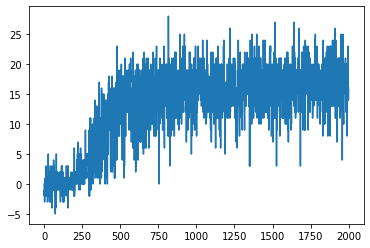

In [11]:
plt.plot(np.array(scores))

In [8]:
env = UnityEnvironment(file_name="Banana.app")

brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
state_size = len(state)

action_size = brain.vector_action_space_size;

dqn_agent = Agent(state_size, action_size, 1024);
dqn_agent.qnetworks[0].load_state_dict(torch.load('qnetworks_duel_0.pt'))

scores = [];
env_info = env.reset(train_mode=False)[brain_name];
state = env_info.vector_observations[0];
score = 0;

for ite in range(1000):
    action = dqn_agent.act(state);

    env_info = env.step(action)[brain_name];
    next_state = env_info.vector_observations[0];

    reward = env_info.rewards[0];
    done = env_info.local_done[0];

    #dqn_agent.step(state, action, reward, next_state, done);
    score = score + reward;
    state = next_state;

    if done:
        break;

print('\Iterations {}\tAverage Score: {:.2f}'.format(ite, score))
scores.append(score);

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


\Iterations 299	Average Score: 17.00
